# 케글 타이타닉
https://www.kaggle.com/competitions/titanic

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

survived : 생존=1, 죽음=0

pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3

sibsp : 함께 탑승한 형제 또는 배우자 수

parch : 함께 탑승한 부모 또는 자녀 수

ticket : 티켓 번호

cabin : 선실 번호

embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

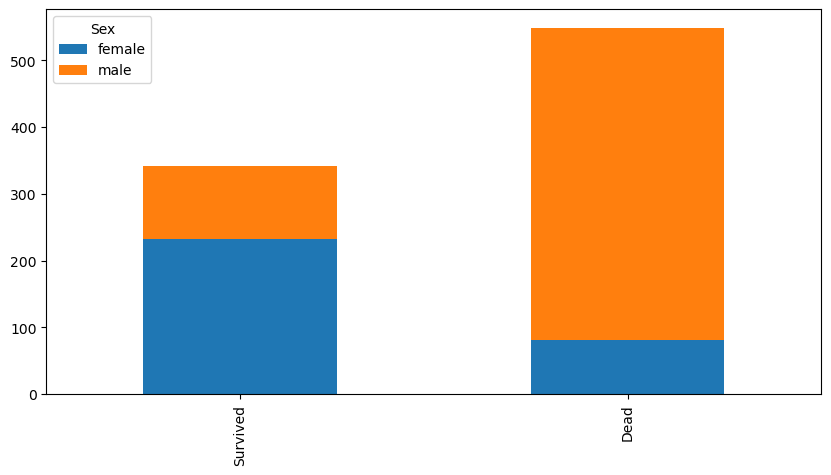

In [9]:
bar_chart('Sex')

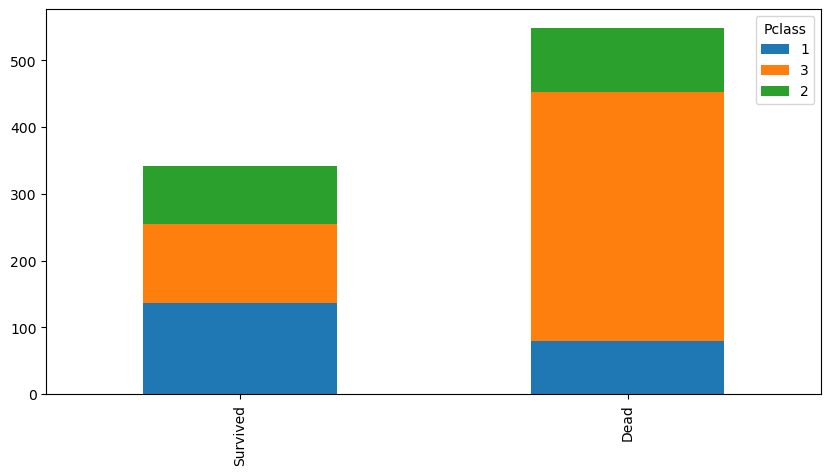

In [10]:
bar_chart('Pclass')

In [11]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)

In [12]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


pd.get_dummies() : 수치형 데이터를 범주형 데이터로 바꾸어주는 함수

수치형 데이터로 사용할 경우에 서로간에 관계가 생기기 때문에

ex) 1+2 = 3

In [13]:
pclass_train_dummies = pd.get_dummies(train_df['Pclass'])
pclass_test_dummies = pd.get_dummies(test_df['Pclass'])

pclass_train_dummies.columns = ['first', 'second', 'third']
pclass_test_dummies.columns = ['first', 'second', 'third']

train_df.drop(['Pclass'], axis=1, inplace=True)
test_df.drop(['Pclass'], axis=1, inplace=True)

train_df = train_df.join(pclass_train_dummies)
test_df = test_df.join(pclass_test_dummies)

In [14]:
train_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,first,second,third
0,0,male,22.0,1,0,7.2500,NaN,S,False,False,True
1,1,female,38.0,1,0,71.2833,C85,C,True,False,False
2,1,female,26.0,0,0,7.9250,NaN,S,False,False,True
3,1,female,35.0,1,0,53.1000,C123,S,True,False,False
4,0,male,35.0,0,0,8.0500,NaN,S,False,False,True


NaN 인 항목들은 평균으로 대체

In [15]:
train_df["Age"].fillna(train_df["Age"].mean() , inplace=True)
test_df["Age"].fillna(train_df["Age"].mean() , inplace=True)

정보가 많지 않은 feature는 제거

In [16]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [17]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
test_df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [19]:
train_df["Embarked"].fillna('S', inplace=True)
test_df["Embarked"].fillna('S', inplace=True)

In [20]:
embarked_train_dummies = pd.get_dummies(train_df['Embarked'])
embarked_test_dummies = pd.get_dummies(test_df['Embarked'])

embarked_train_dummies.columns = ['C', 'Q', 'S']
embarked_test_dummies.columns = ['C', 'Q', 'S']

train_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

train_df = train_df.join(embarked_train_dummies)
test_df = test_df.join(embarked_test_dummies)

In [21]:
train_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,first,second,third,C,Q,S
0,0,male,22.0,1,0,7.2500,False,False,True,False,False,True
1,1,female,38.0,1,0,71.2833,True,False,False,True,False,False
2,1,female,26.0,0,0,7.9250,False,False,True,False,False,True
3,1,female,35.0,1,0,53.1000,True,False,False,False,False,True
4,0,male,35.0,0,0,8.0500,False,False,True,False,False,True


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   first     891 non-null    bool   
 7   second    891 non-null    bool   
 8   third     891 non-null    bool   
 9   C         891 non-null    bool   
 10  Q         891 non-null    bool   
 11  S         891 non-null    bool   
dtypes: bool(6), float64(2), int64(3), object(1)
memory usage: 47.1+ KB


In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   first        418 non-null    bool   
 7   second       418 non-null    bool   
 8   third        418 non-null    bool   
 9   C            418 non-null    bool   
 10  Q            418 non-null    bool   
 11  S            418 non-null    bool   
dtypes: bool(6), float64(2), int64(3), object(1)
memory usage: 22.2+ KB


In [24]:
test_df["Fare"].fillna(0, inplace=True)

In [25]:
test_df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,first,second,third,C,Q,S
0,892,male,34.5,0,0,7.8292,False,False,True,False,True,False
1,893,female,47.0,1,0,7.0000,False,False,True,False,False,True
2,894,male,62.0,0,0,9.6875,False,True,False,False,True,False
3,895,male,27.0,0,0,8.6625,False,False,True,False,False,True
4,896,female,22.0,1,1,12.2875,False,False,True,False,False,True


In [26]:
train_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,first,second,third,C,Q,S
0,0,male,22.0,1,0,7.2500,False,False,True,False,False,True
1,1,female,38.0,1,0,71.2833,True,False,False,True,False,False
2,1,female,26.0,0,0,7.9250,False,False,True,False,False,True
3,1,female,35.0,1,0,53.1000,True,False,False,False,False,True
4,0,male,35.0,0,0,8.0500,False,False,True,False,False,True


In [27]:
sex_train_dummies = pd.get_dummies(train_df['Sex'])
sex_test_dummies = pd.get_dummies(test_df['Sex'])

sex_train_dummies.columns = ['Female', 'Male']
sex_test_dummies.columns = ['Female', 'Male']

train_df.drop(['Sex'], axis=1, inplace=True)
test_df.drop(['Sex'], axis=1, inplace=True)

train_df = train_df.join(sex_train_dummies)
test_df = test_df.join(sex_test_dummies)

In [28]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,first,second,third,C,Q,S,Female,Male
0,0,22.0,1,0,7.2500,False,False,True,False,False,True,False,True
1,1,38.0,1,0,71.2833,True,False,False,True,False,False,True,False
2,1,26.0,0,0,7.9250,False,False,True,False,False,True,True,False
3,1,35.0,1,0,53.1000,True,False,False,False,False,True,True,False
4,0,35.0,0,0,8.0500,False,False,True,False,False,True,False,True


In [29]:
X_train = train_df.drop("Survived",axis=1).copy()
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=30000)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.8047138047138047

In [31]:
print(Y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [32]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree.score(X_train, Y_train)

0.9820426487093153

In [33]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


----
#  연습
torch.tensor(X_train.values, dtype=torch.float)